<br />

<div style="text-align: center;">
<font size="7">数値計算試験予行演習問題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">2020/12/11 実施</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2020 </font>
</div>




 # 簡単な行列計算:25点 
 
 次の行列
  $
  A = \left(\begin{array}{ccc}
    5 & -2 & -2 \\
    2 & 1 & -2 \\
    6 & -2 & -3
  \end{array}
  \right)
  $
  の固有値と固有ベクトルを求めよ．
  また，対角化行列$P$ を用いて，ドット演算 により$P^{-1}.A.P$が対角化されることを確かめよ．


In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) 

A = np.array([[5, -2, -2], [2,1,-2], [6,-2,-3]])
l, P = np.linalg.eig( A )
print(l)
print(P)

[-1.000  3.000  1.000]
[[-0.408 -0.707 -0.577]
 [-0.408 -0.000 -0.577]
 [-0.816 -0.707 -0.577]]


In [2]:
from pprint import pprint
dA = np.dot(np.linalg.inv(P),np.dot(A,P))
np.set_printoptions(precision=3, suppress=True)
print(format(dA))

[[-1.  0.  0.]
 [ 0.  3.  0.]
 [ 0. -0.  1.]]


$P^{-1}.A.P$で固有値(-1,3,1)に対角化されていることが確認できる．

# FFTの強度表示:25点

 FFTによって非整合波の重ね合わせを周波数分解したときの様子を観察する．
  1. $\displaystyle \cos\left(\frac{x}{17}\right)$と
    $\displaystyle \cos\left(\frac{x}{3}\right)$を重ね合わせた関数に
    FFTをかけて（スペクトル）強度を周波数で表示せよ．
  1. 上記2関数にさらに$\displaystyle \frac{1}{4}\cos(2x)$を
    重ね合わせた関数にFFTをかけて（スペクトル）強度を周波数で表示せよ．
  1. 上で求めた1. 2.のスペクトル強度の違いを述べよ．
 

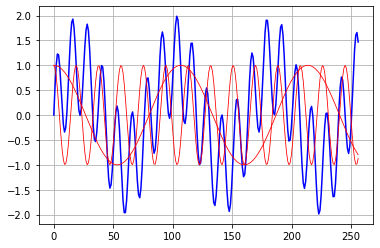

<ipython-input-3-645afdb3c851>:20: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  out = fft(yy)


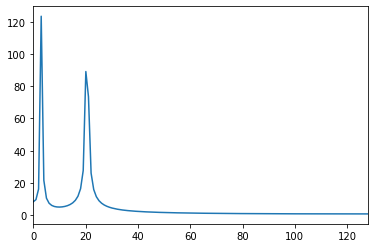

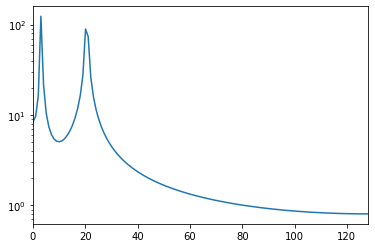

In [3]:
%matplotlib inline
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np


def func(x):
    return np.sin(x/13)+np.sin(x/2)


x = np.linspace(0, 256, 256)  #0から2πまでの範囲を100分割したnumpy配列
plt.plot(x, func(x), color = 'b')
plt.plot(x, np.cos(x/17), color = 'r', linewidth=0.8)
plt.plot(x, np.cos(x/3), color = 'r', linewidth=0.8)

plt.grid()
plt.show()

yy = func(x)
out = fft(yy)

def spectrum_power(x):
    re, im = x.real, x.imag
    return np.sqrt(re**2+im**2)

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.show()

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.yscale('log')
plt.show()

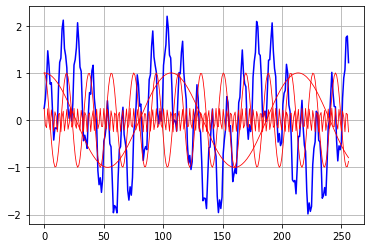

<ipython-input-4-5b09c75519de>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  out = fft(yy)


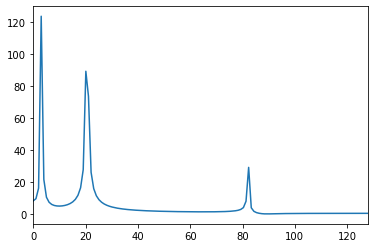

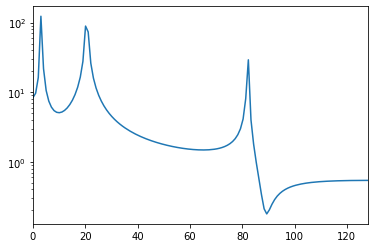

In [4]:
%matplotlib inline
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np


def func(x):
    return np.sin(x/13)+np.sin(x/2)+1/4*np.cos(2*x)


x = np.linspace(0, 256, 256)  #0から2πまでの範囲を100分割したnumpy配列
plt.plot(x, func(x), color = 'b')
plt.plot(x, np.cos(x/17), color = 'r', linewidth=0.8)
plt.plot(x, np.cos(x/3), color = 'r', linewidth=0.8)
plt.plot(x, 1/4*np.cos(2*x), color = 'r', linewidth=0.8)


plt.grid()
plt.show()

yy = func(x)
out = fft(yy)

def spectrum_power(x):
    re, im = x.real, x.imag
    return np.sqrt(re**2+im**2)

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.show()

plt.plot(x,spectrum_power(out))
plt.xlim(0,128)
plt.yscale('log')
plt.show()

2のスペクトルは1に高周波のノイズが乗った感じ．logでプロットすると周波数90あたりに変な落ち込みがあるね．なんだろう．誤差かな．．？

# Gauss-Seidelの収束性:25点
初期値を$[0,0,0]^{t}$として，
  $A(tt)x=b$に
  ガウス・ザイデルによる連立一次方程式の反復解法プログラムを適用する．
  ただし，
  \begin{equation}
   A(tt)=
    \left(
    \begin{array}{ccc}
      5&tt&tt \\
      tt&5&tt \\
      tt&tt&5
    \end{array}
    \right)
    ,
    b=
    \left(
    \begin{array}{c}
      2 \\
      2 \\
      2 \\
    \end{array}
    \right)
  \end{equation}
である．$tt=1,2.5,4.5$に対して有効数字6桁の解を得るための反復回数を求めよ．
(E.クライツィグ著「数値解析」(培風館,2003), p.89, 問題2.3-9改)

In [5]:
import numpy as np
np.set_printoptions(precision=10, suppress=True)


for tt  in [1.0,2.5,4.5]:
    print("tt= ", tt)
    A=np.array([[5,tt,tt],[tt,5,tt],[tt,tt,5]])
    b=np.array([2,2,2])
    n=3
    x0=np.zeros(n)

    for iter in range(0, 10):
        for i in range(0, n):
            x1 = b[i]
            for j in range(0, n):
                x1 -= A[i][j]*x0[j]
            x1 += A[i][i]*x0[i]
            x1 /= A[i][i]
            x0[i] = x1
        print(iter,x0)

tt=  1.0
0 [0.4   0.32  0.256]
1 [0.2848   0.29184  0.284672]
2 [0.2846976   0.28612608  0.285835264]
3 [0.2856077312 0.285711401  0.2857361736]
4 [0.2857104851 0.2857106683 0.2857157693]
5 [0.2857147125 0.2857139036 0.2857142768]
6 [0.2857143639 0.2857142719 0.2857142728]
7 [0.2857142911 0.2857142872 0.2857142843]
8 [0.2857142857 0.285714286  0.2857142857]
9 [0.2857142857 0.2857142857 0.2857142857]
tt=  2.5
0 [0.4 0.2 0.1]
1 [0.25   0.225  0.1625]
2 [0.20625   0.215625  0.1890625]
3 [0.19765625   0.206640625  0.1978515625]
4 [0.1977539062 0.2021972656 0.2000244141]
5 [0.1988891602 0.2005432129 0.2002838135]
6 [0.1995864868 0.2000648499 0.2001743317]
7 [0.1998804092 0.1999726295 0.2000734806]
8 [0.1999769449 0.1999747872 0.2000241339]
9 [0.2000005394 0.1999876633 0.2000058986]
tt=  4.5
0 [0.4   0.04  0.004]
1 [0.3604   0.07204  0.010804]
2 [0.3254404   0.09738004  0.019461604]
3 [0.2948425204 0.117126288  0.0292280724]
4 [0.2682810756 0.1322417668 0.0395294418]
5 [0.2454059122 0.143558

tt=1では6回程度で，tt=2.5では10回程度で収束しているが，tt=4.5では10回でもまだ収束していない．
100回まで繰り返すと収束しており，大体80回程度で収束している．
お互いの差をとってやれば収束判定が可能であろう．


In [6]:
for tt  in [4.5]:
    print("tt= ", tt)
    A=np.array([[5,tt,tt],[tt,5,tt],[tt,tt,5]])
    b=np.array([2,2,2])
    n=3
    x0=np.zeros(n)

    for iter in range(0, 100):
        for i in range(0, n):
            x1 = b[i]
            for j in range(0, n):
                x1 -= A[i][j]*x0[j]
            x1 += A[i][i]*x0[i]
            x1 /= A[i][i]
            x0[i] = x1
        print(iter,x0)
        if abs(x0[0]-x0[1])<10**(-6):
            break

tt=  4.5
0 [0.4   0.04  0.004]
1 [0.3604   0.07204  0.010804]
2 [0.3254404   0.09738004  0.019461604]
3 [0.2948425204 0.117126288  0.0292280724]
4 [0.2682810756 0.1322417668 0.0395294418]
5 [0.2454059122 0.1435581813 0.0499323158]
6 [0.2258585526 0.1517882185 0.0601179061]
7 [0.2092844879 0.1575378454 0.0698599   ]
8 [0.1953420291 0.1613182638 0.0790057364]
9 [0.1837083999 0.1635572774 0.0874608905]
10 [0.1740836489 0.1646099145 0.0951757929]
11 [0.1661928633 0.1647682094 0.1021350345]
12 [0.1597870804 0.1642700965 0.1083485407]
13 [0.1546432265 0.1633074095 0.1138444276]
14 [0.1505633466 0.1620330032 0.1186632852]
15 [0.1473733404 0.1605670369 0.1228536604]
16 [0.1449213724 0.1590024705 0.1264685414]
17 [0.1430760893 0.1574098324 0.1295626705]
18 [0.1417247474 0.1558413239 0.1321905358]
19 [0.1407713263 0.1543343241 0.1344049146]
20 [0.1401346851 0.1529143602 0.1362558592]
21 [0.1397468025 0.1515976045 0.1377900337]
22 [0.1395511256 0.1503929566 0.139050326 ]
23 [0.1395010457 0.149303

第１項と第２項の差で作ると78回目で収束している．

これらの結果から，Gauss-Seidel法による解の収束は，
対角成分と近い値では，収束が遅くなることがわかった．

# 常微分方程式:25点

 スーパーカーの加速性能をEuler法で求める．
  1. 空気抵抗のない場合に，自動車を静止状態から加速度$2 \times 17.35$ [m/sec$^2$]で
    加速した場合の移動距離と速度の変化をtt=0..5でプロットせよ．
  1. 空気抵抗としてcc=0.5とした場合の移動距離と速度の変化をtt=0..10でプロットせよ．
  1. 上問1. 2.のプロットの違いを，「ゼロよん」と呼ばれる400mを通過するまでの時間や，
  その時の時速を用いて，説明せよ．
  
  空気抵抗は，テキストにある通り，速度に比例するとして，その係数は規格化された係数とする．
  時間の刻み幅dt=0.1[sec]程度をとれ．

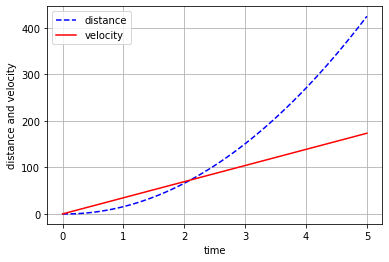

In [35]:
import numpy as np

def euler(x0, v0):
  v1 = v0 + g * dt
  x1 = x0 + v0 * dt
  return x1, v1
import matplotlib.pyplot as plt

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b', linestyle='--',label="distance")
    plt.plot(tt, vv, color = 'r', label="velocity")
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('distance and velocity')
    plt.grid()
    plt.show()
    
g, dt =2*17.35, 0.1
tt,xx,vv=[0.0],[0.0],[0.0]
t = 0.0

for i in range(0,50):
  t += dt
  x, v = euler(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

# print(xx)
# print(vv)
my_plot(xx, vv, tt)

In [39]:
print(xx[-2])
print(vv[-2]*60*60/1000)

408.07199999999995
612.108


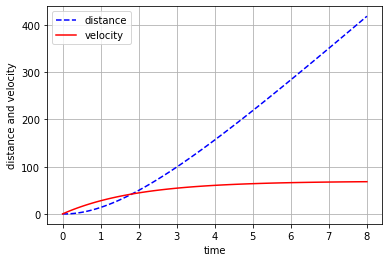

In [21]:
def euler2(x0, v0):
  v1 = v0 + (-cc * v0+ g) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]

g, dt, cc =2*17.35, 0.1, 0.5
tt,xx,vv=[0.0],[0.0],[0.0]
t = 0.0
for i in range(0,80):
  t += dt
  x, v = euler2(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)

In [34]:
print(xx[-4])
print(vv[-4]*60*60/1000)

398.25366550767154
245.02740208619116


xx,vvの値をプリントすることで400mを通過する時間が読み取れる．

空気抵抗がある場合は(500-2)/10秒で．4.98秒，
空気抵抗がない場合は(800-4)/10秒で．7.96秒である．

またそれぞれのその時点での時速は，
空気抵抗がない場合は，612km/h, 空気抵抗がある場合は，245km/hである．現実問題として空気抵抗がない状態で，600km/hでは新幹線の最速を抜くが，ジェット機はまだその先にある．自動車にジェットエンジンを積むのは現実的ではないが，空気抵抗は抑えることができそうである．空気抵抗をいかに抑えることができるかが，車の性能に大く利いていることが実感できる．F1のマシンの空気抵抗はどの程度なのだろう．